# 10-6. 프로젝트: 고양이 수염 스티커 만들기

## 필요한 모듈 import

In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

## 1. 스티커 구하기
* https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1

## 2. 얼굴 검출 & 랜드마크 검출하기

In [2]:
face_front_path = 'images/front.png'

hog_detector = dlib.get_frontal_face_detector() # detector 선언

img = cv2.imread(face_front_path) # 이미지 로드
img = cv2.resize(img, (640, 360)) # 640x360의 크기로 Resize
img_show = img.copy() # 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 컬러 채널 순서 변경 (BGR -> RGB)

dlib_rects = hog_detector(img_rgb, 1) # bounding box 추출
print(dlib_rects)

rectangles[[(210, 125) (339, 254)]]


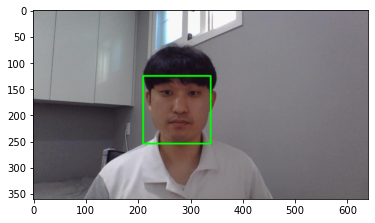

In [3]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# 이미지 출력
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [4]:
# 모델 불러오기
model_path = "models/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

landmarks_list = []

for dlib_rect in dlib_rects:
    # print('curr point: ' + str(dlib_rect))
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    landmarks_list.append(list_points)

print(len(landmarks_list[0]))

68


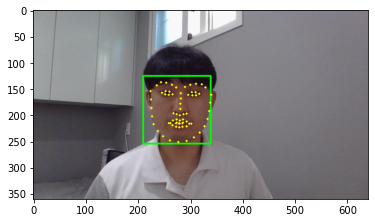

In [5]:
# 랜드마크 출력
for landmark in landmarks_list:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3. 스티커 적용 위치 확인하기
* 볼은 '턱', '눈', '입', '코' 사이에 있다는 점을 이용해 주세요. 비율로 계산하는 방법 잊지 않으셨죠?   

*hint: 2, 36, 48, 30 번 인덱스를 이용*

In [6]:
# print(landmarks_list)

for dlib_rect, landmark in zip(dlib_rects, landmarks_list):
    # w = dlib_rect.width()
    # h = dlib_rect.width()
    
    # 아래는 스티커가 제대로 된 모양인 경우 (cat-whiskers-cropped)
    w = landmark[54][0] - landmark[48][0] # 입꼬리 오른쪽 끝 x - 입꼬리 왼쪽 끝 x
    h = landmark[51][1] - landmark[33][1] # 윗입술 가운데 y - 코 끝 가운데 y
    
    # 처음부터 top left로 설정
    x = landmark[48][0]
    y = landmark[33][1]
    
    '''# LMS에 주어진 스티커 이미지는 정사각형이므로, 그에 맞게 설정
    # w = dlib_rect.width()
    # h = dlib_rect.width()
    
    # w = landmark[54][0] - landmark[48][0] # 입꼬리 오른쪽 끝 x - 입꼬리 왼쪽 끝 x
    # h = landmark[54][0] - landmark[48][0] # 주어진 스티커 이미지가 정사각형이므로, w와 같게
    
    h = landmark[57][1] - landmark[29][1] # 아랫입술 경계 가운데 y - 코 가운데 y
    w = landmark[57][1] - landmark[29][1] # 주어진 스티커 이미지가 정사각형이므로, h와 같게
    
    # top left
    x = landmark[29][0] - w//2
    y = landmark[29][1]
    '''
    
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(x,y) : (259,200)
(w,h) : (43,10)


In [7]:
# img_sticker = cv2.imread('images/cat-whiskers.png')
img_sticker = cv2.imread('images/cat-whiskers-cropped.png')
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

img_sticker = img_sticker[-y:]
print(img_sticker.shape)

(10, 43, 3)
(10, 43, 3)


## 4. 스티커 적용하기
1. 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.
2. 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다.   

*hint: opencv 의 cv2.addWeighted() 를 참고하세요.*

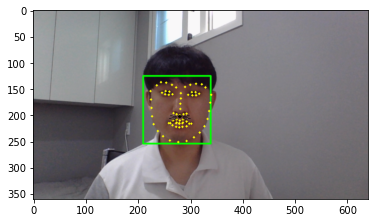

In [8]:
sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

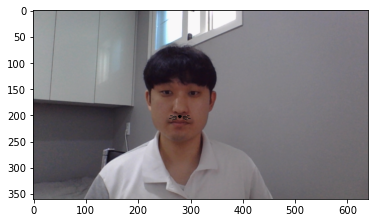

In [9]:
sticker_area = img[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 5. 문제점 찾아보기
* 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?   
    아래 이미지들을 보면, 스티커의 크기와 위치가 face detection된 점에 따라 결정되므로 생각보다는 크게 틀리지 않은 위치에 붙는 것을 확인했다. 다만 고개 각도에 따라 스티커를 **회전** 하는 기능이 필요할 것 같다. 또한 (가능하다면) 옆모습이거나 고개가 위아래를 향해 있을 경우 이미지를 **상하좌우로 눕힌다면** 보다 자연스러운 스티커가 될 것 같다.
    
    
* 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?   
    아래 원거리 이미지에 테스트해본 결과를 보면, 웬만한 원거리에서도 스티커는 잘 붙는다. 다만 피사체가 너무 멀리 있으면 얼굴 자체가 인식이 잘 안 될 수도 있고, 얼굴이 인식되더라도 (스티커 크기가 비율에 따라 결정되기 때문에) width, height 이 지나치게 작아져 스티커 표출이 안 될 수도 있을 것 같다. 옆으로 누운 이미지는 테스트해보지 않았지만, **모델이 랜드마크를 제대로 추출하지 못할 수도** 있을 것 같고, 검출한다 하더라도 현재 단계에서는 **스티커가 회전되지 않기 때문에** 정확하게 달라붙지 않을 것 같다.   
    
    
* 실행 속도가 중요할까요?   
    실제 사용하는 앱이라고 생각하면, 스티커가 얼마나 빨리 붙냐는 중요하다. 스티커 앱을 켜는 건 사진이나 영상을 찍기 위함이기 때문이다. 스티커를 붙이기 위해 몇 초를 기다려야 한다면 스티커 앱의 재미가 크게 떨어질 것 같다.
    
    
* 스티커앱을 만들 때 정확도가 얼마나 중요할까요?   
    정확도는 중요하지만, 어떤 상황에서도 오차가 없을 만큼 정밀한 모델일 필요까지는 없을 것 같다. 스티커 앱을 사용하는 유저는 스티커가 잘 붙도록 각도나 거리를 맞출 의향이 있는 사람들이기 때문이다. 또한 스티커가 약간 잘못된 위치에 붙는 상황이 의외의 재미를 연출할 수도 있다. 물론 상당히 정확해야 하겠지만, 정확도를 끝까지 추구하기보다는 어느 정도 충족되면 속도를 올리는 등 다른 요소를 고려하는 게 좋을 것 같다.

In [10]:
# 테스트를 위해 위 모든 과정을 set_sticker(img_path, sticker_path) 함수로 만듭니다.

def set_sticker(img_path, sticker_path):
    hog_detector = dlib.get_frontal_face_detector() # detector 선언

    img = cv2.imread(img_path) # 이미지 로드
    img = cv2.resize(img, (640, 360)) # 640x360의 크기로 Resize
    img_show = img.copy() # 출력용 이미지 별도 보관
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 컬러 채널 순서 변경 (BGR -> RGB)

    dlib_rects = hog_detector(img_rgb, 1) # bounding box 추출
    
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
        
    model_path = "models/shape_predictor_68_face_landmarks.dat"
    landmark_predictor = dlib.shape_predictor(model_path)

    landmarks_list = []

    for dlib_rect in dlib_rects:
        # print('curr point: ' + str(dlib_rect))
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        landmarks_list.append(list_points)
        
    # 랜드마크 출력
    '''
    for landmark in landmarks_list:
        for idx, point in enumerate(list_points):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
    '''
    
    for dlib_rect, landmark in zip(dlib_rects, landmarks_list):
        # w = dlib_rect.width()
        # h = dlib_rect.width()

        w = landmark[54][0] - landmark[48][0] # 입꼬리 오른쪽 끝 x - 입꼬리 왼쪽 끝 x
        h = landmark[51][1] - landmark[33][1] # 윗입술 가운데 y - 코 끝 가운데 y

        # 처음부터 top left로 설정
        x = landmark[48][0]
        y = landmark[33][1]

        # print('(x,y) : (%d,%d)'%(x,y))
        # print('(w,h) : (%d,%d)'%(w,h))
        
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w, h))
    # print(img_sticker.shape)

    img_sticker = img_sticker[-y:]
    # print(img_sticker.shape)
    
    sticker_area = img[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
    img[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

### 0) 정면 이미지

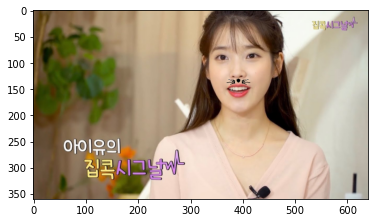

In [11]:
set_sticker('images/test-1.jpg', 'images/cat-whiskers-cropped.png')

### 1) 측면 얼굴 이미지 1

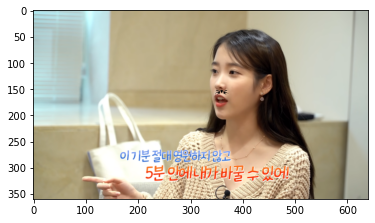

In [12]:
set_sticker('images/test-2.png', 'images/cat-whiskers-cropped.png')

### 2) 측면 얼굴 이미지 2

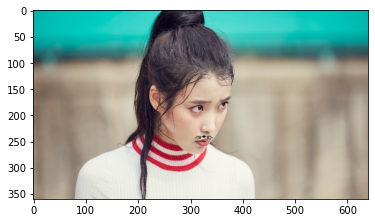

In [13]:
set_sticker('images/test-3.jpg', 'images/cat-whiskers-cropped.png')

### 3) 원거리 이미지

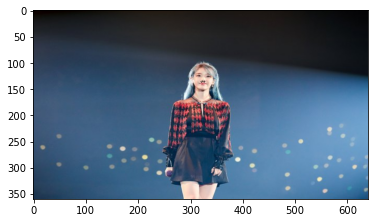

In [14]:
set_sticker('images/test-4.jpg', 'images/cat-whiskers-cropped.png')